# Gradient descent

In this exercice we will make a linear fit to simulated data using the (stochastic) gradient descent method.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize # for fits
%matplotlib inline

### 1. Generate training dataset

a) First Generate N=100 observations of 1-D feature x and target values t, where:
* x is evenly spaced between 0 and 1 (use `np.linspace` function)
* t follows a linear function $f(x)$ plus some random gaussian noise $\epsilon$: $$t_i = f(x_i) + \epsilon = a \cdot x_i + b + \epsilon,$$ with a=2 and b=5, and $\epsilon$ is distributed along the normal distribution `np.random.normal(0,0.1,N)`

b) On a figure plot the values of the N data points $\{x_i,t_i\}$ and draw, on the same figure, the function $f(x)$.


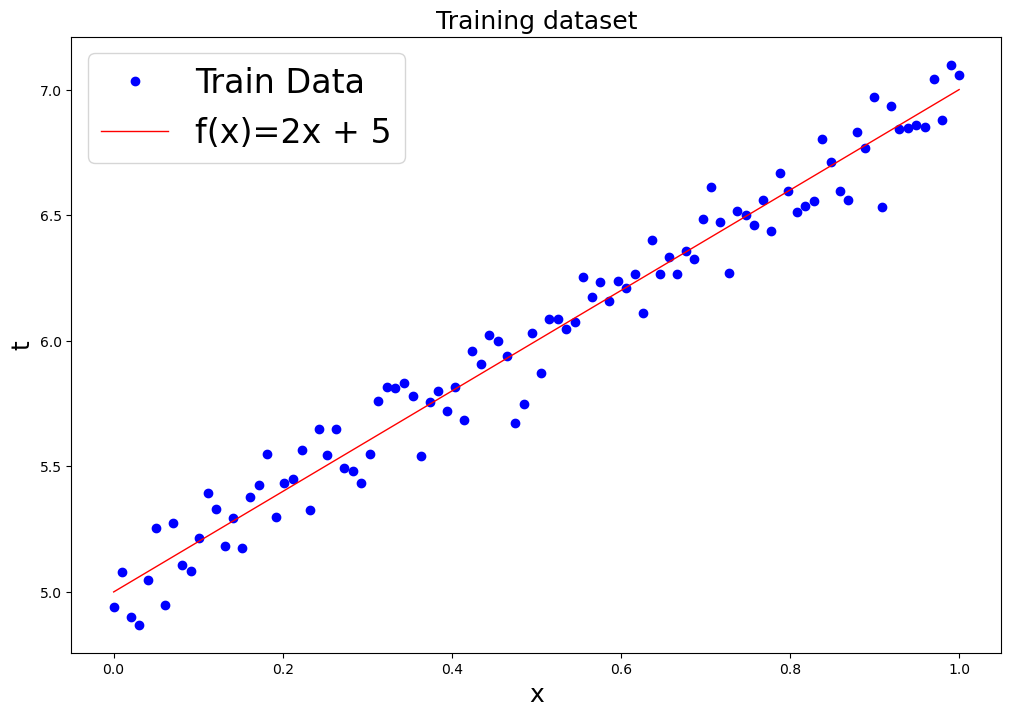

In [2]:
# fit function
def f(x,a,b):
    return a*x + b

# Parameters
a=2
b=5
mu = 0
sigma = 0.1

# Train dataset
N=100
x  = np.linspace(0, 1, N)
epsilon = np.random.normal(mu,sigma,N)
t = np.add(f(x,a,b),epsilon)

# Show figure
X2 = np.linspace(0, 1, 10000)
fig, axes = plt.subplots(figsize=(12,8))
axes.plot(x,t,'bo',lw=1,label='Train Data')
axes.plot(X2,f(X2,a,b),'r-',lw=1,label='f(x)=%.0fx + %.0f' % (a,b))
axes.set_xlabel('x',fontsize=18)
axes.set_ylabel('t',fontsize=18)
axes.set_title('Training dataset',fontsize=18);
#axes.grid()
plt.legend(loc='best',fontsize=24)


### 2. Cost function and gradients

To determine the weights $a$ and $b$ of $f(x)$ we'll use the Mean Square Error cost function:
$$E(a,b) = \frac{1}{N} \sum_{i=1}^N \left(t_i - y(x_i) \right) ^2.$$

The derivatives of the cost function with respect to the parameters $a$ and $b$ are: 

\begin{eqnarray}
\begin{cases}
\frac{\partial E(a,b)}{\partial a} = -2 \frac{1}{N} \sum_{i=1}^N x_i \left(t_i - y(x_i) \right) \\\\
\frac{\partial E(a,b)}{\partial b} = -2 \frac{1}{N} \sum_{i=1}^N \left(t_i - y(x_i) \right) 
\end{cases}
\end{eqnarray}

a) Write a function `E(a,b,x,t)` that return the MSE cost function:
```python
def E(a,b,x,t):
    
    ...
    return E
```

b) Write a function `update_weights` that calculate the partial derivatives of the cost function, and that updates the weights $a$ and $b$ for a given `learning_rate`:
```python
def update_weights(a, b, x, t, learning_rate):
    a_deriv = 0
    b_deriv = 0
    # Calculate partial derivatives
        ...
    # Update weights
    a -= ...
    b -= ...
    return a, b
```

In [3]:
# cost function
def E(a,b,x,t):
    E = np.power(t-f(x,a,b),2).sum()
    return E

def update_weights(a, b, x, t, learning_rate):
    a_deriv = (-2*x * (t - (a*x + b))).sum()
    b_deriv = (-2*(t - (a*x + b))).sum()
    N = len(x)

    # We subtract because the derivatives point in direction of steepest ascent
    a -= (a_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return a, b

### 3. Performing training

a) Starting from initial values $a=1$, $b=1$, apply the gradient descent method `nsteps=1000` times, with `learning_rate=0.05`. Calculate the cost function at each step. What are the values of $a$ and $b$ at the last step ?

b) Make a figure of the cost function as a function of number of steps.

c) Show on a 2-D figure how the value of the parameters $a$ and $b$ change at each step.

True parameters: a=2.00 b=5.00
Gradient descent parameters (1000 steps, learning rate = 0.05): a=1.99 b=5.01


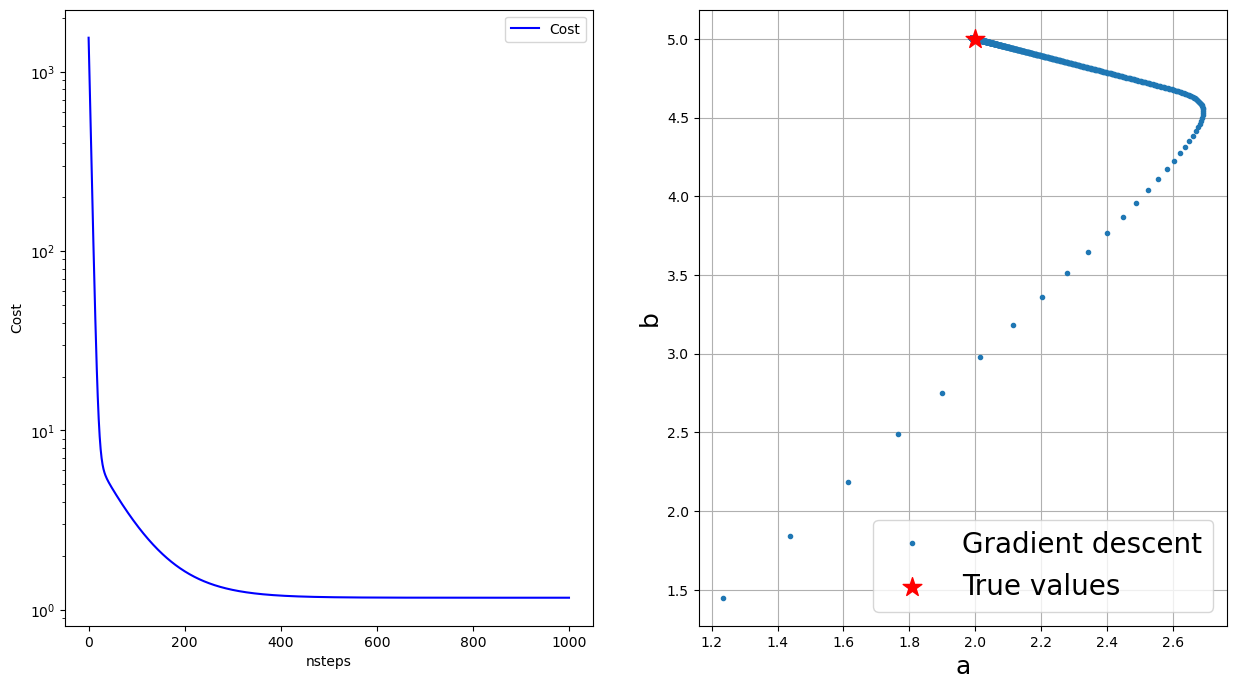

In [4]:
# Parameters
nsteps=1000
a_grad=1 # initial value for a
b_grad=1 # initial value for b
learning_rate = 0.05

# Training
va=[]
vb=[]
cost=[]
for i in range(nsteps):
    a_grad, b_grad = update_weights(a_grad,b_grad,x,t,learning_rate)
    E_value = E(a_grad,b_grad,x,t)
    va.append(a_grad)
    vb.append(b_grad)
    cost.append(E_value)

va=np.array(va)
vb=np.array(vb)
cost=np.array(cost)

print('True parameters: a=%.2f b=%.2f' % (a,b))
print('Gradient descent parameters (%d steps, learning rate = %.2f): a=%.2f b=%.2f' % (nsteps,learning_rate,a_grad,b_grad))

# Figures
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(nsteps), cost, color='blue')
plt.legend(['Cost'], loc='upper right')
plt.xlabel('nsteps')
plt.ylabel('Cost')
plt.yscale('log')

plt.subplot(1,2,2)
plt.plot(va,vb,'.',lw=1,label='Gradient descent')
plt.scatter(a,b,200,'r',marker="*",zorder=10,label='True values')
plt.xlabel('a',fontsize=18)
plt.ylabel('b',fontsize=18)
plt.grid()
plt.legend(loc='best',fontsize=20)


### 4. Stochastic gradient descent

a) Perform gradient descent on batch of 10 events instead of total number of events $N$. This is called ${\it stochastic}$ gradient descent.

b) Redo the same figures as in question 3.

c) Play with batch size and learning rate

True parameters: a=2.00 b=5.00
Gradient descent parameters (1000 steps, learning rate = 0.05): a=2.00 b=4.98


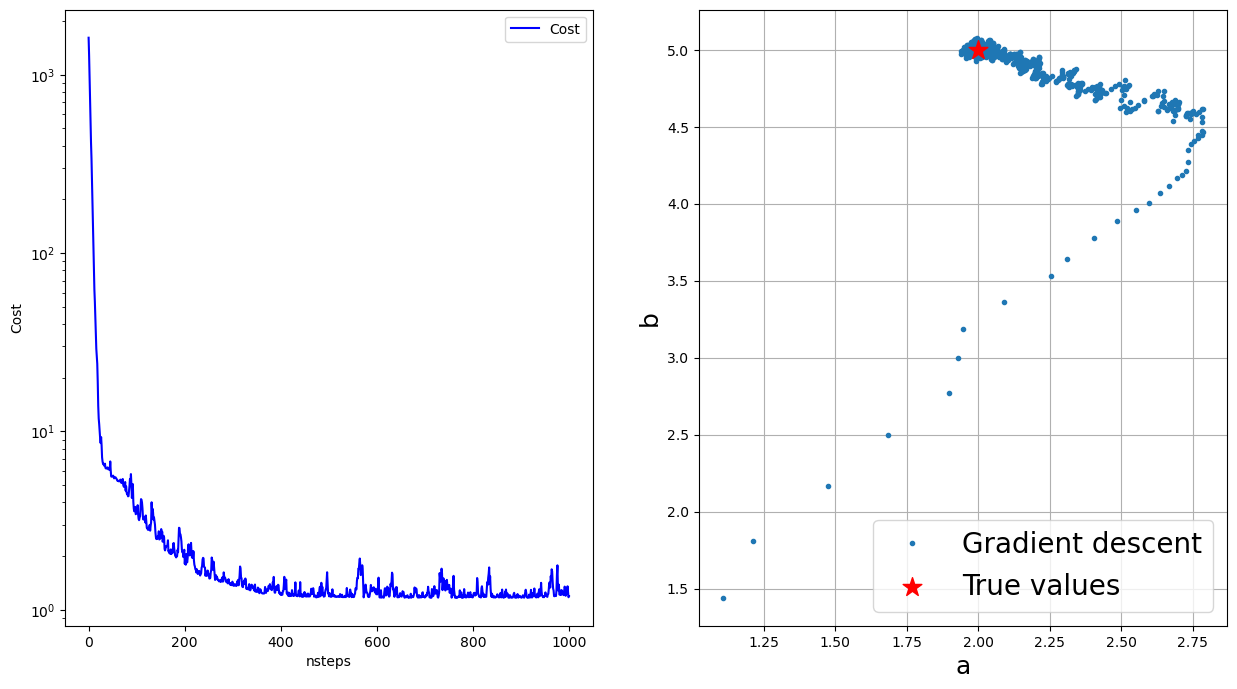

In [5]:
# Parameters
nsteps=1000
a_grad=1 # initial value for a
b_grad=1 # initial value for b
learning_rate = 0.05
batch_size=1 # batch size

# First pair x,t values
x1 = x[:,np.newaxis] # Transform vector into column of dim (100,1)
t1 = t[:,np.newaxis] # Transform vector into column of dim (100,1)
points = np.concatenate((x1,t1),axis=1) # Concatenate two vectors in table of dim (100,2)

# Training
va=[]
vb=[]
cost=[]
for i in range(nsteps):
    np.random.shuffle(points)   # Shuffle values
    XX = points[:batch_size,0]  # x feature
    YY = points[:batch_size,1]  # target value
    a_grad, b_grad = update_weights(a_grad,b_grad,XX,YY,learning_rate)
    E_value = E(a_grad,b_grad,x,t)
    va.append(a_grad)
    vb.append(b_grad)
    cost.append(E_value)

va=np.array(va)
vb=np.array(vb)
cost=np.array(cost)

print('True parameters: a=%.2f b=%.2f' % (a,b))
print('Gradient descent parameters (%d steps, learning rate = %.2f): a=%.2f b=%.2f' % (nsteps,learning_rate,a_grad,b_grad))

# Figures
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(nsteps), cost, color='blue')
plt.legend(['Cost'], loc='upper right')
plt.xlabel('nsteps')
plt.ylabel('Cost')
plt.yscale('log')

plt.subplot(1,2,2)
plt.plot(va,vb,'.',lw=1,label='Gradient descent')
plt.scatter(a,b,200,'r',marker="*",zorder=10,label='True values')
plt.xlabel('a',fontsize=18)
plt.ylabel('b',fontsize=18)
plt.grid()
plt.legend(loc='best',fontsize=20)

### Optional: Fit data with a polynomial function

Check that the fitted parameters are compatible with the true parameters $a$ and $b$.

In [6]:
# dimension of polynomial
M=1
par,residuals, rank, singular_values, rcond = np.polyfit(x, t, M,full=True)
pol = np.poly1d(par)

a_fit=par[0]
b_fit=par[1]

print('Fitted parameters: a=%.3f b=%.3f' % (a_fit, b_fit))

# doc: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html

Fitted parameters: a=1.986 b=5.008
